In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [18]:
#Access data 

dataset = pd.read_csv ('C:/Users/OLANREWAJU/Documents/Courses/Second Semeter/CA2/ML/Dataset/GLODAPv2.2019_Atlantic_Ocean.csv')
dataset.head()

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
0,2.0,234.0,1.0,1986.0,7.0,17.0,0.0,0.0,-58.483,-0.99,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
1,2.0,234.0,1.0,1986.0,7.0,17.0,0.0,0.0,-58.483,-0.99,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
2,2.0,234.0,3.0,1986.0,7.0,17.0,0.0,0.0,-58.483,-0.99,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
3,2.0,234.0,1.0,1986.0,7.0,17.0,0.0,0.0,-58.483,-0.99,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0
4,2.0,234.0,1.0,1986.0,7.0,17.0,0.0,0.0,-58.483,-0.99,...,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0,-9999.0,9.0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437026 entries, 0 to 437025
Columns: 102 entries, cruise to chlaf
dtypes: float64(102)
memory usage: 340.1 MB


In [12]:
#Data Understanding

row = len(dataset.axes[0])
column = len(dataset.axes[1])
print("Number of Rows: "+ str(row))
print("Number of Columns: "+ str(column))

Number of Rows: 437026
Number of Columns: 102


In [13]:
#Data preprocessing - N/A

dataset.isnull()

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437021,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
437022,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
437023,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
437024,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# split data - trainset and testset
X = dataset.iloc[:, 13:14]
y = dataset.iloc[:, 14]

print(X)
print (y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

        pressure
0            8.8
1            8.8
2           15.1
3           20.0
4           20.5
...          ...
437021     577.7
437022      21.0
437023     157.0
437024     306.6
437025     347.3

[437026 rows x 1 columns]
0           9.0
1           9.0
2          15.0
3          20.0
4          20.0
          ...  
437021    571.0
437022     21.0
437023    155.0
437024    303.0
437025    344.0
Name: depth, Length: 437026, dtype: float64


In [42]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
#Test Prediction
predictions = model.predict(X_test)
predictions

array([ 789.29657982, 2791.67164749,   22.4181945 , ..., 1477.72976374,
       1183.55780055, 1152.29219751])

In [47]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
156015,790.00,789.296580
195818,2801.00,2791.671647
321247,18.87,22.418195
68274,61.00,64.162691
367751,128.00,130.565719
405191,327.00,327.784817
235972,306.00,306.646123
429319,22.00,25.452334
252123,1780.00,1772.786602
136928,200.00,201.345931


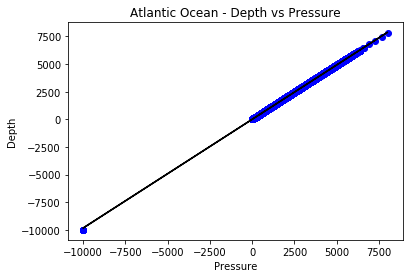

In [53]:
#Visualization (train set)

plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regr.predict(X_train), color = 'black')
plt.title('Atlantic Ocean - Depth vs Pressure')
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.show()

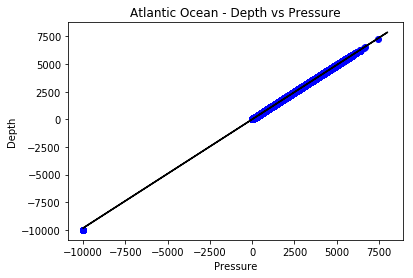

In [54]:
#Visualizing (test set)
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regr.predict(X_train), color = 'black')
plt.title('Atlantic Ocean - Depth vs Pressure')
plt.xlabel('Pressure')
plt.ylabel('Depth')
plt.show()

In [55]:
#correlation 
dataset.corr()

,cruise,station,cast,year,month,day,hour,minute,latitude,longitude,...,toc,tocf,doc,docf,don,donf,tdn,tdnf,chla,chlaf
cruise,1.000000,0.055082,0.173181,0.460749,-0.065638,0.003123,-0.189946,-0.187155,0.123445,-0.035093,...,-0.006114,0.006114,0.049849,-0.049854,0.000009,-0.000157,0.071778,-0.071761,0.002928,-0.002929
station,0.055082,1.000000,-0.010474,0.014270,0.008062,-0.009218,0.006415,0.006202,0.070700,0.005670,...,-0.002672,0.002672,-0.010842,0.010842,-0.001446,0.001447,-0.009176,0.009176,-0.000775,0.000775
cast,0.173181,-0.010474,1.000000,0.162559,0.038525,0.000012,0.022697,0.023450,0.003935,0.015154,...,-0.009602,0.009602,-0.026557,0.026569,0.022643,-0.022768,-0.031496,0.031497,0.070619,-0.070617
year,0.460749,0.014270,0.162559,1.000000,-0.086619,0.014732,-0.090824,-0.085659,0.037226,-0.111420,...,-0.005339,0.005339,0.173369,-0.173377,-0.002307,0.002220,0.165599,-0.165593,-0.087700,0.087699
month,-0.065638,0.008062,0.038525,-0.086619,1.000000,-0.020915,-0.162084,-0.162785,0.199367,0.008474,...,-0.058115,0.058115,0.001610,-0.001578,0.046924,-0.046939,-0.013400,0.013360,0.027017,-0.027017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
donf,-0.000157,0.001447,-0.022768,0.002220,-0.046939,0.000636,-0.003161,-0.003089,0.029864,-0.021624,...,0.001353,-0.001353,0.005058,-0.005058,-0.999974,1.000000,0.004639,-0.004639,-0.131751,0.131751
tdn,0.071778,-0.009176,-0.031496,0.165599,-0.013400,-0.002287,0.016621,0.017947,-0.005934,-0.016608,...,-0.006800,0.006800,0.841122,-0.841081,-0.004639,0.004639,1.000000,-0.999999,-0.019925,0.019925
tdnf,-0.071761,0.009176,0.031497,-0.165593,0.013360,0.002307,-0.016621,-0.017947,0.005897,0.016645,...,0.006800,-0.006800,-0.841118,0.841076,0.004639,-0.004639,-0.999999,1.000000,0.019925,-0.019925
chla,0.002928,-0.000775,0.070619,-0.087700,0.027017,0.001475,0.013114,0.012527,0.032971,0.067050,...,-0.005812,0.005812,-0.010920,0.010937,0.132089,-0.131751,-0.019925,0.019925,1.000000,-1.000000


In [56]:
#Intercept & Slope

print(regr.intercept_)
print(regr.coef_)

3.72372355221637
[0.98319506]


In [57]:
print("Skewness: %f" % dataset['depth'].skew())
print("Kurtosis: %f" % dataset['depth'].kurt())

Skewness: 1.135350
Kurtosis: 0.523102


In [59]:
#Evaluation

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.600693622714907
Mean Squared Error: 25.12497901728298
Root Mean Squared Error: 5.012482320894806
